## Baseband communications and wireless channels
We will study digial communications and wireless channels in baseband. 

### Gaussian pulse 

Consider Gaussian pulse:  
$g(t) = \exp\left(-\frac{(t-0.5T)^2}{0.03T^2}\right), 0 \le t \le T$.   
(1) Draw $g(t)$ using computer simulation. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

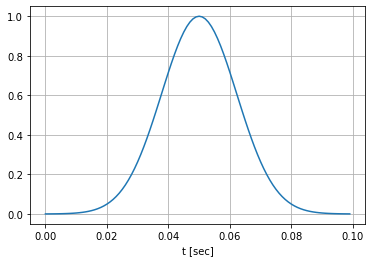

In [2]:
T_symbol = 0.1 ## sec  T
sample_rate = 1000 ## samples/sec

### shift to the right as much as T/2 
x = np.arange(0,T_symbol,1/sample_rate) #t
y = np.exp(-(x-0.5*T_symbol)**2/(0.03*T_symbol**2)) #g(t)
plt.plot(x,y)
plt.xlabel('t [sec]')
plt.grid()

Let $\psi(t)$ be like    
\begin{align}
\psi(t) =A g(t), 0 \le t \le T.
\end{align}
(2) Find the value of $A$ which makes $\psi(t)$ as orthonormal basis function. Use computer simulation. 

Hint.1) Energy of $\psi(t)$ should be 1:  
$E_{\psi} = \int^{T}_{0}\psi(t)^2 dt = 1$  


Hint.2) The intergal of a continuous function can be implemented approximately like:  
\begin{align}
\int^{T}_{0}f(t) dt = \lim_\limits{\Delta t \rightarrow 0}\sum^\limits{N}_{n=1}f(n \Delta t) \Delta t,  
\end{align}
where $N\Delta t = T$.


In [3]:
delta_t = 1 / sample_rate
N_symbol = int(T_symbol / delta_t)
sum_rec = 0

f_t = np.square(y)

for n in range(N_symbol):
    rectangle = f_t * delta_t
    
sum_rec = np.sum(rectangle)

A = 1 / np.sqrt(sum_rec)
print(A)

6.787185496755432


(3) Defind a python function, Gauss_pulse(T_symbol, sample_rate), which generates $\psi(t)$. 

In [4]:
def Gauss_pulse(T_symbol, sample_rate):
    return A*y

Energy of the orthonormal Gaussian pulse: 0.9999999999999997


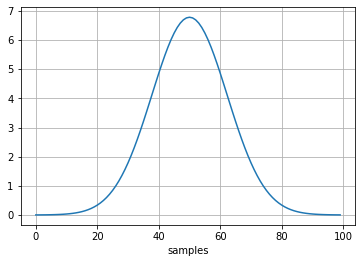

In [5]:
T_symbol = 0.1    
sample_rate = 1000    
temp_pulse = Gauss_pulse(T_symbol, sample_rate)
plt.plot(temp_pulse)
plt.grid()
plt.xlabel('samples')
print("Energy of the orthonormal Gaussian pulse:", np.sum(temp_pulse**2/sample_rate))

### pulse train, x(t)
Generate bit sequence and BPSK symbols.   
data = [0 1 0 1 0 1 $\cdots$]   
$X = [-\sqrt{E}, \sqrt{E}, -\sqrt{E}, \sqrt{E}, -\sqrt{E}, \sqrt{E}, \cdots]$, where $E = \frac{1}{A^2}$.

(4) Generate a baseband signal, $x(t)$, defined as 

\begin{align}
x(t) = X[0]\psi(t) + X[1]\psi(t-T) + X[1]\psi(t-T) + \cdots
\end{align}


hint ) Use np.concatenate() function  

x = np.array([])   
x = np.concatenate((x,temp_pulse),axis=0)


data: [1 0 1 1 1 1 0 1 1 1]
Energy of x(t) within T, E: 0.021708037461829234
BPSK symbols, X: [ 0.14733648 -0.14733648  0.14733648  0.14733648  0.14733648  0.14733648
 -0.14733648  0.14733648  0.14733648  0.14733648]


Text(0, 0.5, 'x(t)')

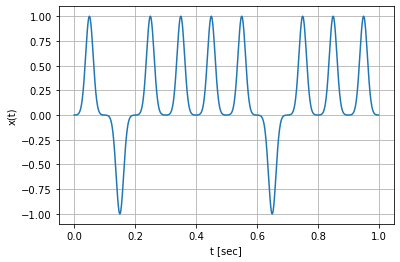

In [6]:
T_symbol = 0.1
sample_rate = 1000    
N_symbol = 10



E = 1 / np.square(A)
data = np.random.randint(0, 2, N_symbol)

X = (np.sqrt(E)*(data*2-1)) #루트E * data


#적분
for n in range(int(E)):
    rectangle = np.square(A*y)*delta_t
    
E_of_x_t = np.sum(rectangle)


x_t = np.array([])
x = np.arange(0,T_symbol*N_symbol,1/sample_rate) #t

#x(t)
for n in range(N_symbol):
    bi_ortho = X[n] * temp_pulse
    x_t = np.concatenate((x_t,bi_ortho), axis=0)


print('data:', data)
print('Energy of x(t) within T, E:', E_of_x_t)
print('BPSK symbols, X:', X)

plt.plot(x,x_t)
plt.grid()
plt.xlabel('t [sec]')
plt.ylabel('x(t)')


### correlation-type demodulator
First, assume there is no noise. That is, 
$y(t) = x(t)$

(5) Calculate the correlation between $y(t)$ and $\psi(t)$ for $0\le t \le T$,   
$\int^{T}_{0} y(t)\psi(t) dt$

Since $t$ is discrete in computer program, we approximate the integral using the following relationship   
$\int^{T}_{0} y(t)\psi(t) dt= \lim_\limits{\Delta t \rightarrow \infty} \sum^\limits{N}_{n=1}y(n\Delta t)\psi(n\Delta t)\Delta t$,  
where $T = N \Delta t$.

#### sliding window
Output of sliding window is defined as   
$r(\tau) = \int^{T+\tau}_{\tau} y(t)\psi(t-\tau) dt $

(6) Draw $r(\tau)$ for $0 \le \tau \le 0.5$ and sample $r(t)$ at every T second such as $[r(0), r(T), r(2T), r(3T), \cdots]$

In [7]:
cor = X[0]*temp_pulse * A*y

for n in range(10):
    rectangle = cor * delta_t
    
sum_rec = np.sum(rectangle)

print('correlation in (5):', sum_rec)
print('\sqrt(E)', np.sqrt(E))

correlation in (5): 0.14733647702395095
\sqrt(E) 0.14733647702395097


sampled at every T: [ 0.14733648 -0.14733648  0.14733648  0.14733648  0.14733648]


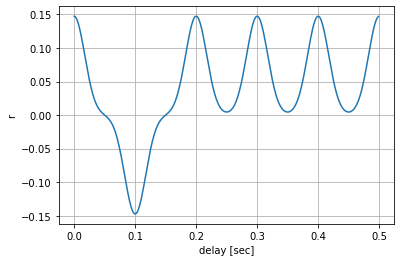

In [8]:
array = np.array([])
r = np.array([])

slidingWindow = np.array([])
r_tao = np.array([])

sum_rec = 0

def sliding_window(arr):
    global slidingWindow
    global sum_rec
    global r_tao
    
    for i in range(500):
        slidingWindow = arr[i:i+int(T_symbol*sample_rate)] * A * y
        
        for j in range (int(T_symbol / delta_t)):
            rectangle = slidingWindow * delta_t
        sum_rec = np.sum(rectangle)
        
        r_tao = np.append(r_tao, sum_rec)
        
    return r_tao


array = x_t
r = sliding_window(array)

plt.plot(np.arange(0,500)/sample_rate,r)
plt.grid()    
plt.xlabel('delay [sec]')
plt.ylabel('r')

print("sampled at every T:",r[::int(T_symbol*sample_rate)])

### Multipath fading channels
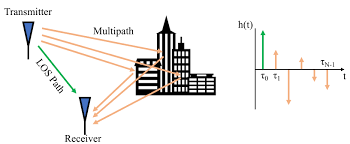

The transmitted signal is attenuated and delayed by multiple reflectors.  

\begin{align}
y(t) & = \sum_\limits{n=0}^{N-1} \alpha_n x(t-\tau_n)\\
& = \sum_\limits{n=0}^{N-1} (\alpha_n \delta(t-\tau_n)*x(t))\\
& = x(t)*\sum_\limits{n=0}^{N-1} \alpha_n \delta(t-\tau)\\
\end{align}


(7) Generate $y(t)$ using $x(t)$ and delay profile such as  
Delay profile  
$\alpha = [1, -0.8, 0.2, 0.1]$  
$\tau = [0, 6, 10, 30]$ [msec]   
$\sum_\limits{n=0}^{N-1} \alpha_n \delta(t-\tau) = [1, 0, 0.8, 0, 0.2, 0, 0, 0, 0, 0, 0.01]$


Use np.convolve() function

In [9]:
alpha = np.array([1, -0.8, 0.2, 0.1]) # alpha <= 1 신호세기의 감쇠
tao = np.array([0, 6, 10, 30])

delay_profile = np.zeros(31)

for n in range(len(tao)):
    delay_profile[tao[n]] = alpha[n]

print(delay_profile)

[ 1.   0.   0.   0.   0.   0.  -0.8  0.   0.   0.   0.2  0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.1]


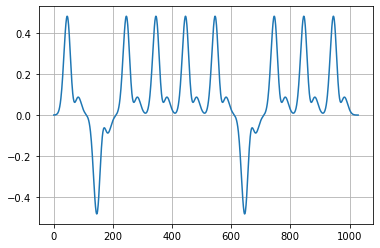

In [10]:
y_t = np.convolve(x_t, delay_profile)

plt.plot(y_t)
plt.grid()

(8) Apply the sliding window to $y(t)$ and sample $r(t)$ at every T second such as $[r(0), r(T), r(2T), r(3T), \cdots]. 

In [11]:
## correlation window 
array = np.array([])
r = np.array([])

slidingWindow = np.array([])
r_tao = np.array([])

sum_rec = 0

def sliding_window(arr):
    global slidingWindow
    global sum_rec
    global r_tao
    
    for i in range(500):
        slidingWindow = arr[i:i+int(T_symbol*sample_rate)] * A * y
        
        for j in range (int(T_symbol / delta_t)):
            rectangle = slidingWindow * delta_t
        sum_rec = np.sum(rectangle)
        
        r_tao = np.append(r_tao, sum_rec)
        
    return r_tao


array = y_t
r = sliding_window(array)


Text(0, 0.5, 'r')

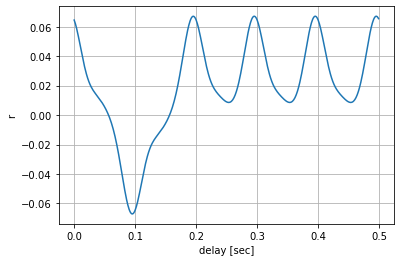

In [12]:
plt.plot(np.arange(0,500)/sample_rate,r)
plt.grid()    
plt.xlabel('delay [sec]')
plt.ylabel('r')

In [13]:
print("sampled at every T:",r[::int(T_symbol*sample_rate)])

sampled at every T: [ 0.06456233 -0.06455849  0.06455849  0.06456617  0.06456617]
